In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
metadata = pd.read_csv('../metadata.csv', sep=';')
metadata = metadata.rename(columns={'Run': 'Sample'})
metadata.head()

,Sample,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,BioSampleModel,Bytes,Center Name,Collection_Date,...,Organism,Platform,ReleaseDate,create_date,version,Sample Name,SRA Study,Class,Age,Sex
0,SRR15595353,WGS,302,2362150078,PRJNA757365,SAMN20959238,Metagenome or environmental,952983886,COSMOSID,2019,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:31:00Z,1,CeD100D2,SRP333874,Celiac,NaN,NaN
1,SRR15595352,WGS,302,2289132216,PRJNA757365,SAMN20959239,Metagenome or environmental,907381926,COSMOSID,2019,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:30:00Z,1,CeD101D2,SRP333874,Celiac,NaN,NaN
2,SRR15595351,WGS,302,3553113050,PRJNA757365,SAMN20959242,Metagenome or environmental,1568323738,COSMOSID,2019,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:33:00Z,1,CeD110D2,SRP333874,Celiac,NaN,NaN
3,SRR15595350,WGS,302,3170046888,PRJNA757365,SAMN20959281,Metagenome or environmental,1357168858,COSMOSID,2019,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:32:00Z,1,CeD110ST,SRP333874,Celiac,NaN,NaN
4,SRR15595349,WGS,302,3070539398,PRJNA757365,SAMN20959243,Metagenome or environmental,1241391813,COSMOSID,2019,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:35:00Z,1,CeD111D2,SRP333874,Celiac,NaN,NaN


In [124]:
species_features_all = pd.read_csv('species_features_all.csv', sep=';')
species_features_all.head()

,Sample,Enterobacter chengduensis,Enterobacter ludwigii,Klebsiella quasivariicola,Klebsiella quasipneumoniae,Klebsiella pneumoniae,Klebsiella aerogenes,MGYG000003882,Serratia liquefaciens,Serratia ureilytica,...,UBA11549 sp900768185,MGYG000001574,CAG-312 sp900548275,UBA71 sp900767505,MGYG000003817,Weissella confusa_B,CAG-312 sp900546565,Sutterella sp900545275,CAG-312 sp900760665,MGYG000004053
0,SRR15595353,96163,1.0,1624,23.0,13.0,1.0,1.0,553,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SRR15595352,87221,0.0,2904,33.0,11.0,0.0,2.0,837,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR15595351,137859,0.0,2022,41.0,18.0,1.0,1.0,585,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR15595350,54,6.0,558,16.0,427.0,10.0,6.0,135,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR15595349,102817,3.0,5816,41.0,15.0,1.0,1.0,1681,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
def extract_bacteria_counts_kraken(kraken_report, sample, level='S'):
  data = pd.read_table(kraken_report, names=['percentage', 'total_count', 'self_count', 'rank', 'tax_id', 'name'], skipinitialspace=True)
  # print(data.loc[data['rank'] == level].shape)
  return pd.DataFrame([{
    'Sample': sample,
    'n_features': data.loc[data['rank'] == level].shape[0]
  }])

df = pd.DataFrame(columns=['Sample', 'n_features'])

for sample in metadata['Sample']:
  df = pd.concat([
    df,
    extract_bacteria_counts_kraken(kraken_report=f'./data/{sample}/report.txt', sample=sample, level='S')
  ])

In [99]:
result = pd.merge(metadata, df, on='Sample')
result.loc[result['Isolation_Source']=='']['Isolation_Source'].value_counts()

Series([], Name: count, dtype: int64)

In [126]:
import pandas as pd

mapping = {
  'Celiac': 1,
  'Non-Celiac': 0,
  'tCD-TG+': 1,
  'tCD-TG-': 1,
  'Untreated CD': 1,
  'Healthy': 0,
}
result['label'] = result['Class'].map(mapping)

In [168]:
samples_сeliac = result.loc[result['Class']=='Celiac']['Sample'].to_list()
samples_non_celiac = result.loc[result['Class']=='Non-Celiac']['Sample'].to_list()
samples_tCD_TG_positive = result.loc[result['Class']=='tCD-TG+']['Sample'].to_list()
samples_tCD_TG_negative = result.loc[result['Class']=='tCD-TG-']['Sample'].to_list()
samples_untreated_cd = result.loc[result['Class']=='Untreated CD']['Sample'].to_list()
samples_healthy = result.loc[result['Class']=='Healthy']['Sample'].to_list()

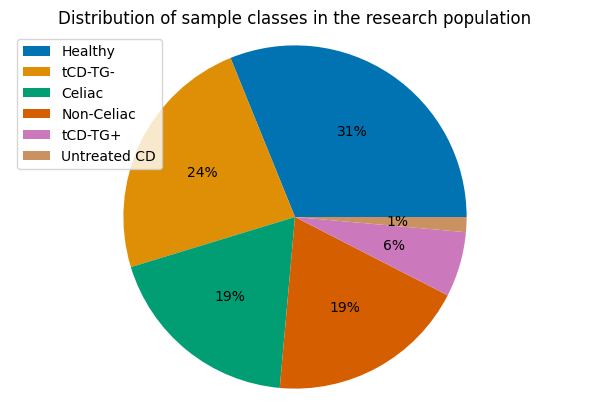

In [137]:
plt.figure(figsize=(6, 4))
plot = plt.pie(result['Class'].value_counts(), colors=sns.color_palette('colorblind')[0:6], autopct='%.0f%%')
plt.legend(plot[0], result['Class'].value_counts().index, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.title('Distribution of sample classes in the research population')
plt.show()

In [140]:
from scipy.stats import chi2_contingency

# Assuming you have class labels for both datasets in 'dataset1_classes' and 'dataset2_classes'

observed = [result.loc[result['BioProject']=='PRJNA757365']['label'].value_counts().to_list(),
            result.loc[result['BioProject']!='PRJNA757365']['label'].value_counts().to_list()]

chi2, p_value, _, _ = chi2_contingency(observed)

if p_value > 0.05:
    print("The distribution of classes is consistent between the two datasets.")
else:
    print("The distribution of classes differs significantly between the two datasets.")

The distribution of classes is consistent between the two datasets.


,Enterobacter chengduensis,Enterobacter ludwigii,Klebsiella quasivariicola,Klebsiella quasipneumoniae,Klebsiella pneumoniae,Klebsiella aerogenes,MGYG000003882,Serratia liquefaciens,Serratia ureilytica,Klebsiella_A indica,...,UBA11549 sp900768185,MGYG000001574,CAG-312 sp900548275,UBA71 sp900767505,MGYG000003817,Weissella confusa_B,CAG-312 sp900546565,Sutterella sp900545275,CAG-312 sp900760665,MGYG000004053
0,96163,1.0,1624,23.0,13.0,1.0,1.0,553,1.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,87221,0.0,2904,33.0,11.0,0.0,2.0,837,0.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137859,0.0,2022,41.0,18.0,1.0,1.0,585,1.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,54,6.0,558,16.0,427.0,10.0,6.0,135,3.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,102817,3.0,5816,41.0,15.0,1.0,1.0,1681,0.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1500,60.0,18,30.0,51.0,51.0,5.0,45,6.0,35.0,...,3.0,34.0,0.0,1.0,0.0,0.0,1.0,55.0,0.0,1.0
208,512,7355.0,755,293.0,13201.0,81.0,138.0,5,2.0,75.0,...,11.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,2.0
209,3344,6.0,408,37.0,45.0,22.0,105.0,127,0.0,6.0,...,14.0,0.0,1.0,0.0,4.0,5.0,0.0,2.0,2.0,10.0
210,117,20.0,882,4.0,10.0,3.0,180.0,6,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,2.0,26.0,0.0,1.0


/var/folders/t1/wk3fwzss61vb_rjtwmnz1y4w0000gn/T/ipykernel_3438/1358564095.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=dataset_PRJNA757365_transformed[:, 0], y=dataset_PRJNA757365_transformed[:, 1], label='Dataset PRJNA757365', palette='colorblind')
/var/folders/t1/wk3fwzss61vb_rjtwmnz1y4w0000gn/T/ipykernel_3438/1358564095.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=dataset_PRJNA904924_transformed[:, 0], y=dataset_PRJNA904924_transformed[:, 1], label='Dataset PRJNA904924', palette='colorblind')


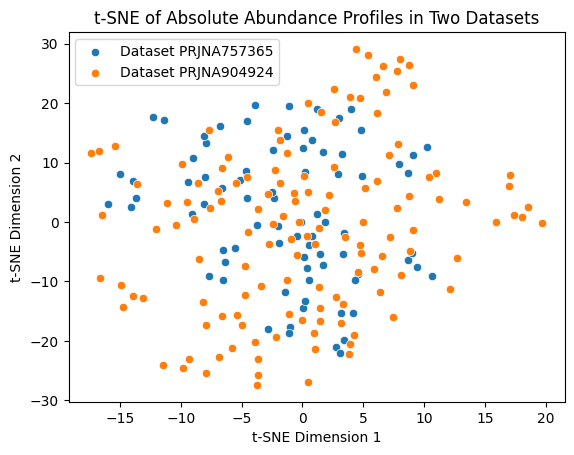

In [246]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have the relative abundance profiles for each dataset in 'dataset1_relative_abundance' and 'dataset2_relative_abundance'
# combined_data = dataset1_relative_abundance + dataset2_relative_abundance

tsne = TSNE(n_components=2, random_state=42, perplexity=10)

dataset_PRJNA757365_transformed = tsne.fit_transform(species_features_all.loc[species_features_all['Sample'].isin(samples_PRJNA757365)].drop(columns=['Sample']))
dataset_PRJNA904924_transformed = tsne.fit_transform(species_features_all.loc[species_features_all['Sample'].isin(samples_PRJNA904924)].drop(columns=['Sample']))
sns.scatterplot(x=dataset_PRJNA757365_transformed[:, 0], y=dataset_PRJNA757365_transformed[:, 1], label='Dataset PRJNA757365', palette='colorblind')
sns.scatterplot(x=dataset_PRJNA904924_transformed[:, 0], y=dataset_PRJNA904924_transformed[:, 1], label='Dataset PRJNA904924', palette='colorblind')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title(label='t-SNE of Absolute Abundance Profiles in Two Datasets')
plt.show()

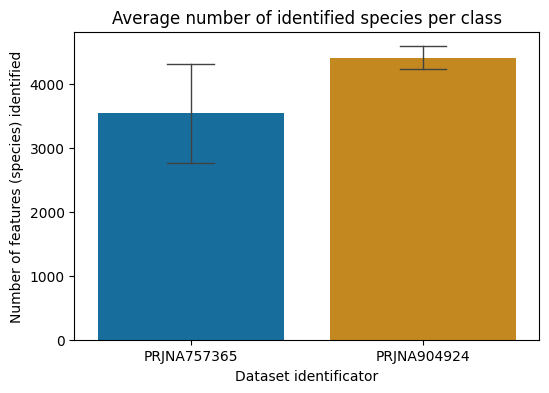

In [212]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=result,
    x="BioProject",
    y="n_features",
    errorbar="sd",
    estimator="mean",
    palette="colorblind",
    errwidth=1,
    capsize=0.2
)
plt.ylabel("Number of features (species) identified")
plt.xlabel("Dataset identificator")
plt.title(label="Average number of identified species per class")
plt.show()

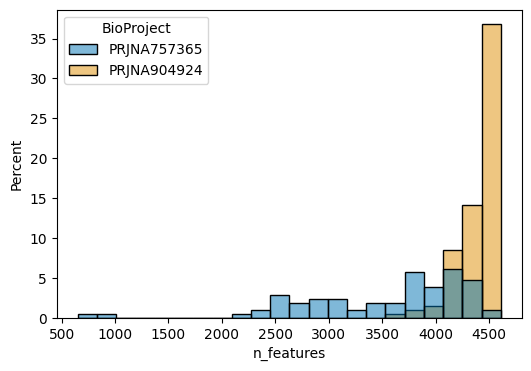

In [231]:
plt.figure(figsize=(6, 4))
sns.histplot(
    data=result,
    x="n_features",
    hue="BioProject",
    stat='percent',
    hue_norm=(0,1),
    palette="colorblind",
    log_scale=False,
)
plt.show()

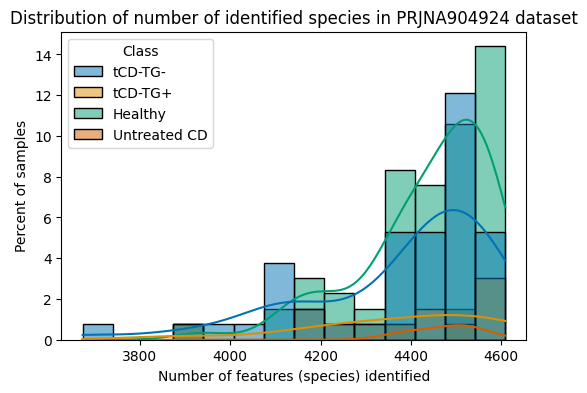

In [251]:
plt.figure(figsize=(6, 4))
sns.histplot(data=result.loc[result['BioProject'] == 'PRJNA904924'], x='n_features', hue="Class", kde=True, palette='colorblind', stat='percent')
plt.ylabel('Percent of samples')
plt.xlabel('Number of features (species) identified')
plt.title(label='Distribution of number of identified species in PRJNA904924 dataset')
plt.show()

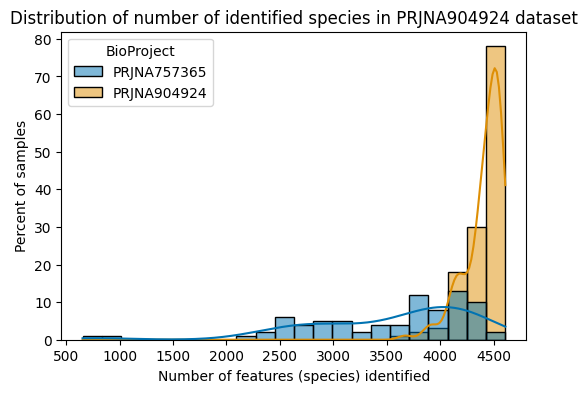

In [253]:
plt.figure(figsize=(6, 4))
sns.histplot(data=result, x='n_features', hue="BioProject", kde=True, palette='colorblind')
plt.ylabel('Percent of samples')
plt.xlabel('Number of features (species) identified')
plt.title(label='Distribution of number of identified species in PRJNA904924 dataset')
plt.show()

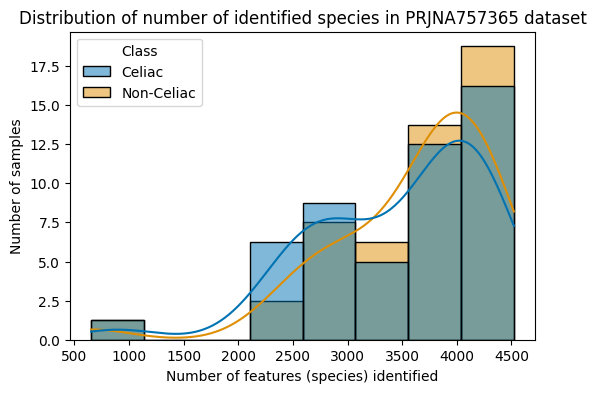

In [248]:
plt.figure(figsize=(6, 4))
sns.histplot(data=result.loc[result['BioProject'] == 'PRJNA757365'], x='n_features', hue="Class", kde=True, palette='colorblind', stat='percent')
plt.ylabel('Percent of samples')
plt.xlabel('Number of features (species) identified')
plt.title(label='Distribution of number of identified species in PRJNA757365 dataset')
plt.show()

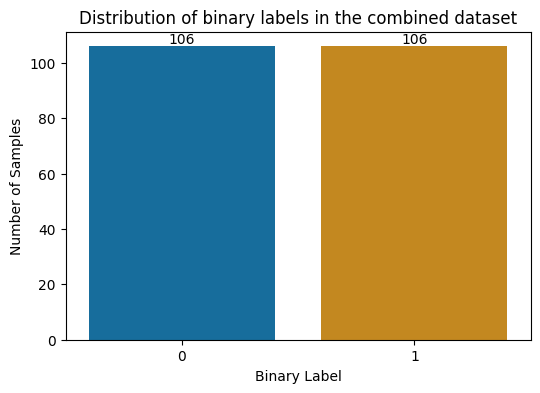

In [245]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(
  data=result,
  x="label",
  palette="colorblind",
)
ax.bar_label(ax.containers[0])
plt.xlabel("Binary Label")
plt.ylabel("Number of Samples")
plt.title(label="Distribution of binary labels in the combined dataset")
plt.show()